<a href="https://colab.research.google.com/github/SouridyaDey/credit-risk-modelling-for-loan-default/blob/master/Credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK MODELLING FOR LOAN DEFAULTERS

## Objective: To develop a model to predict the probability of default (PD) for mortgage loan applicants, enabling automatic rejection of high-risk applicants.
.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

### Loading the dataset

In [2]:
df = pd.read_csv('Quant_Challenge_data_amended.csv')

In [3]:
df.head(20)

,Unnamed: 0,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
0,0,18785.517943694504,12300,67.0,0.009772532761805456,NaN,Single,7106.014471346445,1,18JUL2018 - 00:00:00,NaN
1,1,12861.495159877606,Not avail.,113.0,0.003509136597401741,Employee,Divorced,7694.806893720367,1,16JUL2018 - 00:00:00,0
2,2,14886.776341632107,10700,Not avail.,0.013310346283231944,Worker,Single,7142.496337537019,1,21DEC2010 - 00:00:00,1
3,3,Not avail.,33000,112.0,0.004760874885112928,Employee,Single,7446.1706118576485,1,05NOV2015 - 00:00:00,0
4,4,15897.753806874589,19900,59.0,0.02121608748572823,Worker,Separated,7241.656646188094,1,13JUL2015 - 00:00:00,1
5,5,30494.619635750943,28500,38.0,0.02459450253712046,Worker,Divorced,6566.899666826923,1,25JAN2016 - 00:00:00,1
6,6,34720.702548474204,NaN,75.0,Not avail.,Worker,Single,14731.80930367151,1,10APR2014 - 00:00:00,0
7,7,31606.202672328945,14000,122.0,0.0036307461402543717,Employee,Single,7075.138485887948,1,19FEB2015 - 00:00:00,0
8,8,35963.25630084985,Not avail.,103.0,0.004589365943634535,Employee,Separated,9069.076779295736,1,28MAR2017 - 00:00:00,0
9,9,39686.88094449992,16200,85.0,0.0048022981589469224,Employee,Married,10278.352720753282,2,11SEP2010 - 00:00:00,0


### Display the rows and columns

In [4]:
df.shape

(10000, 11)

### Remove the first column 'Unnamed:0' which is not necessary

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head(5)

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
0,18785.517943694504,12300,67.0,0.009772532761805456,NaN,Single,7106.014471346445,1,18JUL2018 - 00:00:00,NaN
1,12861.495159877606,Not avail.,113.0,0.003509136597401741,Employee,Divorced,7694.806893720367,1,16JUL2018 - 00:00:00,0
2,14886.776341632107,10700,Not avail.,0.013310346283231944,Worker,Single,7142.496337537019,1,21DEC2010 - 00:00:00,1
3,Not avail.,33000,112.0,0.004760874885112928,Employee,Single,7446.1706118576485,1,05NOV2015 - 00:00:00,0
4,15897.753806874589,19900,59.0,0.02121608748572823,Worker,Separated,7241.656646188094,1,13JUL2015 - 00:00:00,1


### Checking for duplicates

In [7]:
df.duplicated().any()

np.False_

### Separating the training and Out-of-test (OOT), which will serve as our unseen data.

### Any data collected between 2016-2018 will serve as OOT data

In [8]:
# Converting OBS_DATE to datetime format
df['OBS_DATE'] = pd.to_datetime(df['OBS_DATE'], format="%d%b%Y - %H:%M:%S", errors='coerce')

# Define date range for OOT sample
oot_start = pd.to_datetime("2016-01-01")
oot_end = pd.to_datetime("2018-12-31")

# Creating boolean masks for training and OOT data
oot_mask = (df['OBS_DATE'] >= oot_start) & (df['OBS_DATE'] <= oot_end)
train_mask = df['OBS_DATE'] < oot_start

# Filter the DataFrame using the masks
df_train = df[train_mask].copy()
df_oot = df[oot_mask].copy()

# Print the size of each set
print("Training set size:", df_train.shape)
print("OOT set size:", df_oot.shape)


Training set size: (6803, 10)
OOT set size: (2632, 10)


### Removing the 'observation date' column
##### It is now of no need as we have already separated our dataset based on time

In [9]:
df_train.drop(columns=['OBS_DATE'], inplace=True)
df_oot.drop(columns=['OBS_DATE'], inplace=True)

In [10]:
df_train.head(20)

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var
2,14886.776341632107,10700,Not avail.,0.013310346283231944,Worker,Single,7142.496337537019,1,1
3,Not avail.,33000,112.0,0.004760874885112928,Employee,Single,7446.1706118576485,1,0
4,15897.753806874589,19900,59.0,0.02121608748572823,Worker,Separated,7241.656646188094,1,1
6,34720.702548474204,NaN,75.0,Not avail.,Worker,Single,14731.80930367151,1,0
7,31606.202672328945,14000,122.0,0.0036307461402543717,Employee,Single,7075.138485887948,1,0
9,39686.88094449992,16200,85.0,0.0048022981589469224,Employee,Married,10278.352720753282,2,0
11,40859.610611028416,14600,47.0,0.007602576070279438,2,Married,6248.914403920378,NaN,Not avail.
12,17186.184242083495,17800,53.0,0.01954180473530513,Worker,Single,11850.819652935996,1,0
13,16173.57325530241,25600,40.0,0.039570723791057104,Worker,Divorced,9161.01317091043,1,0
14,Not avail.,11800,75.0,0.0055870602967944515,Worker,Living together,7533.469389024128,1,0


### Some descriptive measures

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6803 entries, 2 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          6602 non-null   object
 1   loan_amount     6585 non-null   object
 2   term_length     6582 non-null   object
 3   install_to_inc  6591 non-null   object
 4   occup           6587 non-null   object
 5   marital         6614 non-null   object
 6   schufa          6609 non-null   object
 7   num_applic      6599 non-null   object
 8   target_var      6608 non-null   object
dtypes: object(9)
memory usage: 531.5+ KB


In [12]:
df_train.describe()

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var
count,6602,6585,6582,6591,6587,6614,6609,6599,6608
unique,6383,380,163,6397,7,6,6381,3,3
top,Not avail.,Not avail.,Not avail.,Not avail.,Worker,Single,Not avail.,1,0
freq,220,213,174,195,3076,2603,229,4521,5449


### Checking for any missing values

In [13]:
df_train.isnull().sum()


,0
income,201
loan_amount,218
term_length,221
install_to_inc,212
occup,216
marital,189
schufa,194
num_applic,204
target_var,195


In [14]:
df_train['target_var'].value_counts()

,count
target_var,
0,5449
1,973
Not avail.,186


### Replacing Not avail. with NaN to help in imputation later

In [15]:
df_train.replace("Not avail.", np.nan, inplace=True)
df_oot.replace("Not avail.", np.nan, inplace=True)

### This will ignore any leftover strings

In [16]:
df_train['target_var'] = pd.to_numeric(df_train['target_var'], errors='ignore')
df_oot['target_var'] = pd.to_numeric(df_oot['target_var'], errors='ignore')

### Filling Nan records with 0: defaulters in our target column

##### Since we don't have the default information about the missing records, we make them fall under Non-defaulters class: 0

In [17]:
df_train['target_var'] = df_train['target_var'].fillna(0)
df_oot['target_var'] = df_oot['target_var'].fillna(0)

### Distribution of defaulters and non-defaulters

In [18]:
class_names = {0:'Non-defaulter', 1:'Defaulter'}
print(df_train['target_var'].value_counts().rename(index = class_names))

target_var
Non-defaulter    5830
Defaulter         973
Name: count, dtype: int64


### To ensure that numeric columns are not mistakenly stored as strings

In [19]:
num_cols = ['income', 'loan_amount', 'term_length', 'install_to_inc', 'schufa', 'num_applic', 'target_var']

for col in num_cols:
    df_train[col] = pd.to_numeric(df_train[col])
    df_oot[col] = pd.to_numeric(df_oot[col])

### Checking the skewness for each features
##### This will help us decide whether to go for median imputation or something else.

In [20]:
# List of numeric columns
numeric_columns = ['income', 'loan_amount', 'term_length', 'install_to_inc', 'schufa', 'num_applic']

# Convert columns to numeric (if not already)
for col in numeric_columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# Loop to calculate and print skewness
for col in numeric_columns:
    skew_val = df_train[col].skew()
    print(f"Skewness of '{col}': {skew_val:.2f}")


Skewness of 'income': 0.48
Skewness of 'loan_amount': 0.27
Skewness of 'term_length': 0.50
Skewness of 'install_to_inc': 4.09
Skewness of 'schufa': 0.92
Skewness of 'num_applic': 0.90


##### Since, most of them are almost close to 1, it is safe to go for median imputation for the numerical features

### Missing value Imputation

In [21]:
# Numeric columns
num_cols = ['income', 'loan_amount', 'term_length', 'install_to_inc', 'schufa', 'num_applic']

num_imputer = SimpleImputer(strategy='median')
df_train[num_cols] = num_imputer.fit_transform(df_train[num_cols])
df_oot[num_cols] = num_imputer.transform(df_oot[num_cols])

# Categorical columns
cat_cols = ['occup', 'marital']

cat_imputer = SimpleImputer(strategy='constant', fill_value='Not available')

df_train[cat_cols] = cat_imputer.fit_transform(df_train[cat_cols])
df_oot[cat_cols] = cat_imputer.transform(df_oot[cat_cols])

##### For categorical features, we have imputed the missing value with 'Not available' as we have no prior information and imputing with some value might affect the data

In [22]:
df_train.head(20)

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var
2,14886.776342,10700.0,63.0,0.013310,Worker,Single,7142.496338,1.0,1.0
3,25953.007588,33000.0,112.0,0.004761,Employee,Single,7446.170612,1.0,0.0
4,15897.753807,19900.0,59.0,0.021216,Worker,Separated,7241.656646,1.0,1.0
6,34720.702548,20200.0,75.0,0.012717,Worker,Single,14731.809304,1.0,0.0
7,31606.202672,14000.0,122.0,0.003631,Employee,Single,7075.138486,1.0,0.0
9,39686.880944,16200.0,85.0,0.004802,Employee,Married,10278.352721,2.0,0.0
11,40859.610611,14600.0,47.0,0.007603,2,Married,6248.914404,1.0,0.0
12,17186.184242,17800.0,53.0,0.019542,Worker,Single,11850.819653,1.0,0.0
13,16173.573255,25600.0,40.0,0.039571,Worker,Divorced,9161.013171,1.0,0.0
14,25953.007588,11800.0,75.0,0.005587,Worker,Living together,7533.469389,1.0,0.0


In [23]:
df_train['occup'].value_counts()

,count
occup,
Worker,3076
Employee,1882
Student,1236
Not available,419
2,69
1,65
3,56


In [24]:
df_train['marital'].value_counts()

,count
marital,
Single,2603
Separated,976
Married,950
Living together,946
Divorced,918
Not available,410


### Replacing extra categorical features of 'Occupation' column with 'Others'

In [25]:
# Ensure 'occup' column is in the correct format (string type)
df_train['occup'] = df_train['occup'].astype(str)
df_oot['occup'] = df_oot['occup'].astype(str)

# Replace 1, 2, 3 with 'Others'
df_train['occup'] = df_train['occup'].replace({'1': 'Others', '2': 'Others', '3': 'Others'})
df_oot['occup'] = df_oot['occup'].replace({'1': 'Others', '2': 'Others', '3': 'Others'})

In [26]:
df_train['occup'].value_counts()

,count
occup,
Worker,3076
Employee,1882
Student,1236
Not available,419
Others,190


### Checking for Outliers with boxplot

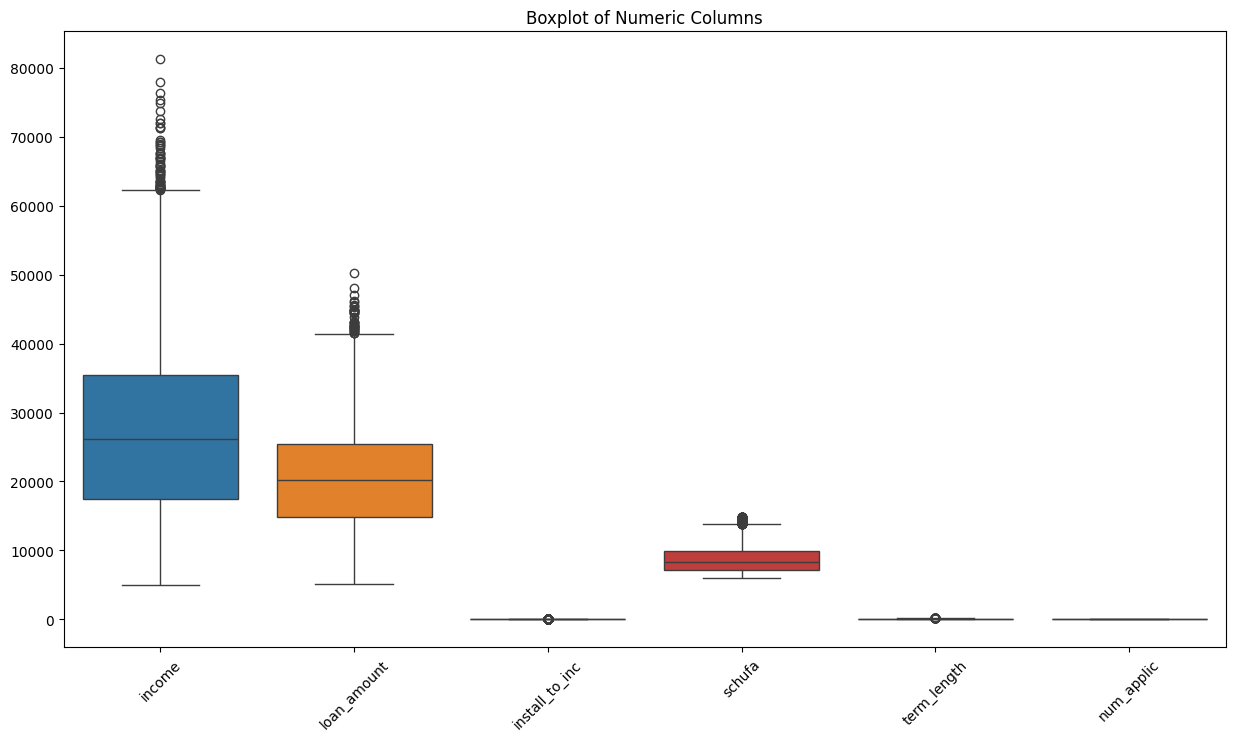

In [27]:
# Select numeric columns
numeric_cols = ['income', 'loan_amount', 'install_to_inc', 'schufa', 'term_length', 'num_applic']

plt.figure(figsize=(15, 8))
df_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Use seaborn to plot
sns.boxplot(data=df_numeric)

plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

### Detecting outliers based on quantile method

In [28]:
numeric_cols = ['income', 'loan_amount', 'install_to_inc', 'schufa', 'term_length', 'num_applic']

outlier_counts = {}

for col in numeric_cols:
    lower_bound = df_train[col].quantile(0.01)
    upper_bound = df_train[col].quantile(0.99)
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display the outlier counts
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers (based on 1st and 99th percentiles)")

income: 138 outliers (based on 1st and 99th percentiles)
loan_amount: 134 outliers (based on 1st and 99th percentiles)
install_to_inc: 138 outliers (based on 1st and 99th percentiles)
schufa: 138 outliers (based on 1st and 99th percentiles)
term_length: 132 outliers (based on 1st and 99th percentiles)
num_applic: 0 outliers (based on 1st and 99th percentiles)


### Though there are some extreme values, but they shouldn't be treated as outliers.

##### Income and loan amount could be high in some cases as it reflects real life data

### Separating Dependent and independent variables

In [29]:
# Separating  features and target for training
X_train = df_train.drop(columns=['target_var'], errors = 'ignore')
y_train = df_train['target_var']

# Same for OOT set
X_oot = df_oot.drop(columns=['target_var'], errors = 'ignore')
y_oot = df_oot['target_var']

In [30]:
X_train.head()

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic
2,14886.776342,10700.0,63.0,0.013310,Worker,Single,7142.496338,1.0
3,25953.007588,33000.0,112.0,0.004761,Employee,Single,7446.170612,1.0
4,15897.753807,19900.0,59.0,0.021216,Worker,Separated,7241.656646,1.0
6,34720.702548,20200.0,75.0,0.012717,Worker,Single,14731.809304,1.0
7,31606.202672,14000.0,122.0,0.003631,Employee,Single,7075.138486,1.0


In [31]:
y_train.head()

,target_var
2,1.0
3,0.0
4,1.0
6,0.0
7,0.0


### Implementing OHE and MinMaxScaling with the help of pipeline

In [32]:
# Define categorical columns (OHE) and let others be numeric
cat_cols = ['occup', 'marital']
num_cols = [col for col in X_train.columns if col not in cat_cols]  # auto-identify numeric

# Create the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), cat_cols)
], remainder='passthrough')  # keeps numeric columns

# Pipeline to preprocess then scale
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('scale', MinMaxScaler())
])


### 'Fit_transformed' on training data and only 'transformed' on OOT data just to see how well our model performs on unseen data

In [33]:
X_train_preprocessed = pipeline.fit_transform(X_train)
X_oot_preprocessed = pipeline.transform(X_oot)

### Retrieve the feature names

In [34]:
# Get OHE feature names
ohe_feature_names = pipeline.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(cat_cols)

# Combine with numeric column names (these are passed through)
all_feature_names = list(ohe_feature_names) + num_cols


### Create the dataframe with all the feature names

In [35]:
# Rebuild DataFrames with proper names
X_train = pd.DataFrame(X_train_preprocessed, columns=all_feature_names, index=X_train.index)
X_oot= pd.DataFrame(X_oot_preprocessed, columns=all_feature_names, index=X_oot.index)

In [36]:
X_train.head()

,occup_Not available,occup_Others,occup_Student,occup_Worker,marital_Living together,marital_Married,marital_Not available,marital_Separated,marital_Single,income,loan_amount,term_length,install_to_inc,schufa,num_applic
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.129157,0.130536,0.252475,0.031973,0.129054,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.274447,0.650350,0.495050,0.010246,0.163398,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.142430,0.344988,0.232673,0.052064,0.140269,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.389560,0.351981,0.311881,0.030465,0.987355,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.348669,0.207459,0.544554,0.007374,0.121436,0.0


In [37]:
X_oot.head()

,occup_Not available,occup_Others,occup_Student,occup_Worker,marital_Living together,marital_Married,marital_Not available,marital_Separated,marital_Single,income,loan_amount,term_length,install_to_inc,schufa,num_applic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.180344,0.167832,0.272277,0.022982,0.124928,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102567,0.351981,0.500000,0.007065,0.191517,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.334075,0.545455,0.128713,0.060650,0.063958,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.405873,0.351981,0.450495,0.009810,0.346938,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.042652,0.256410,0.148515,0.115546,0.125331,0.0


### Calculating VIF to check for multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []



for i in range (15):
    vif.append(variance_inflation_factor(X_train.iloc[:, :], i))


In [39]:
pd.DataFrame({'Training vif': vif}, index = X_train.columns[:]).T

,occup_Not available,occup_Others,occup_Student,occup_Worker,marital_Living together,marital_Married,marital_Not available,marital_Separated,marital_Single,income,loan_amount,term_length,install_to_inc,schufa,num_applic
Training vif,1.211346,1.097828,2.436045,2.757942,2.149416,2.428819,1.417388,1.920519,3.503124,8.276036,7.630231,5.280274,2.886235,2.921514,1.700835


### Here the VIF of 3 features: Income, Loan amount and term length are greater than 5. But, these are important features for our credit risk modelling. Also, after removing them our model's performance to capture actual defaulters has reduced. Hence, keeping all these features as it is.

In [40]:
X_train.shape

(6803, 15)

In [41]:
X_oot.shape

(2632, 15)

### Model training

## 1.Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(X_oot)

### Evaluating the performance of our fitted model on OOT sample

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
print(confusion_matrix(y_oot, y_pred))
print(classification_report(y_oot, y_pred))

[[2159   78]
 [ 212  183]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2237
         1.0       0.70      0.46      0.56       395

    accuracy                           0.89      2632
   macro avg       0.81      0.71      0.75      2632
weighted avg       0.88      0.89      0.88      2632



### There is a case of class imbalance as evident by looking at the support

### The recall for defaulters (1) is very low which is our main concern here. So we need to improve this

### Now, fitting a Logistic Regression considering the case of class imbalance. Here the model is tuned via class weights to favour recall for minority class, which is good for assessing credit risk.

### Also, hyperparameter tuning with different hyperparameters have been done with 5-fold cross-validation using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for Logistic Regression
#param_grid_lr = {
#    'penalty': ['l1', 'l2'],
#   'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
#    'solver': ['liblinear'],  # 'liblinear' supports both L1 and L2
#    'class_weight': ['balanced']
#}
#lr_grid = GridSearchCV(LogisticRegression(), param_grid_lr, scoring = 'roc_auc', cv=5,n_jobs = -1)
#lr_grid.fit(X_train, y_train)

#print(lr_grid.best_params_)

In [46]:
#Initialize Logistic Regression with class_weight='balanced'
log_reg = LogisticRegression(class_weight='balanced', C = 10, penalty = 'l2', solver = 'liblinear', random_state=42)

#Fit the model
log_reg.fit(X_train, y_train)

# Predicting on training and OOT sets
y_train_pred = log_reg.predict(X_train)
y_oot_pred = log_reg.predict(X_oot)

# Predicted probabilities
y_train_proba = log_reg.predict_proba(X_train)[:, 1]
y_oot_proba = log_reg.predict_proba(X_oot)[:, 1]

# Gini = 2 * AUC - 1
gini_train = 2 * roc_auc_score(y_train, y_train_proba) - 1
gini_oot = 2 * roc_auc_score(y_oot, y_oot_proba) - 1

# Evaluating performance
print("TRAIN SET EVALUATION:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_proba ))
print("Gini (Train):", round(gini_train, 4))

print("\nOOT SET EVALUATION:")
print(confusion_matrix(y_oot, y_oot_pred))
print(classification_report(y_oot, y_oot_pred))
print("ROC-AUC:", roc_auc_score(y_oot,y_oot_proba ))
print("Gini (OOT):", round(gini_oot, 4))

TRAIN SET EVALUATION:
[[4736 1094]
 [ 125  848]]
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.89      5830
         1.0       0.44      0.87      0.58       973

    accuracy                           0.82      6803
   macro avg       0.71      0.84      0.73      6803
weighted avg       0.90      0.82      0.84      6803

ROC-AUC: 0.9221787578513518
Gini (Train): 0.8444

OOT SET EVALUATION:
[[1808  429]
 [  54  341]]
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      2237
         1.0       0.44      0.86      0.59       395

    accuracy                           0.82      2632
   macro avg       0.71      0.84      0.73      2632
weighted avg       0.89      0.82      0.84      2632

ROC-AUC: 0.9172105498435404
Gini (OOT): 0.8344


### Here, our recall for class 1 has improved a lot which is good as our model can correctly predict 86% defaulters on unseen data.

### In credit scoring, a Gini above 0.6 is typically considered good. At 0.83, the model is highly predictive and likely performs very well in separating high-risk and low-risk applicants.

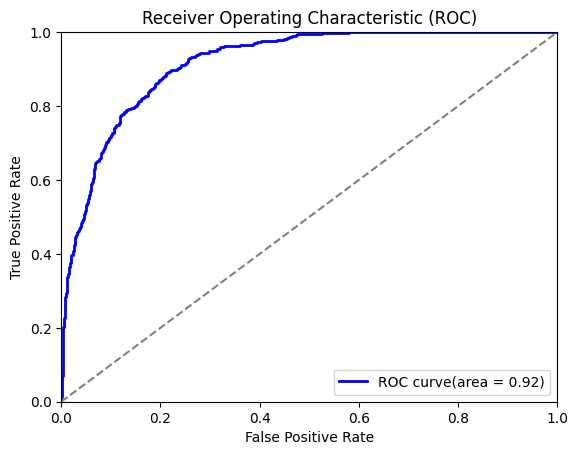

In [47]:
# plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_oot, y_oot_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label= 'ROC curve(area = %0.2f)' % roc_auc_score(y_oot, y_oot_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### A score of 0.92 indicates excellent discrimination — the model correctly ranks defaulters vs. non-defaulters 92% of the time.

### Now, we proceed with two key tools used to evaluate effectiveness of our Credit Decisioning Model

### Deciling

In [48]:
#Creating DataFrames for train and OOT with predicted probabilities and actual target
train_results = pd.DataFrame({
    'probability': y_train_proba,
    'target': y_train
})

oot_results = pd.DataFrame({
    'probability': y_oot_proba,
    'target': y_oot
})

#Creating deciles based on training data
quantiles = train_results['probability'].quantile(np.linspace(0, 1, 11)).values  # 11 bin edges for 10 deciles

#Assigning deciles to training data
train_results['decile'] = pd.cut(train_results['probability'], bins=quantiles, labels=False, include_lowest=True)
train_results['decile'] = 10 - train_results['decile']  # Decile 1 = highest prob

#Assigning same decile cutoffs to OOT data
oot_results['decile'] = pd.cut(oot_results['probability'], bins=quantiles, labels=False, include_lowest=True)
oot_results['decile'] = 10 - oot_results['decile']

#Summarizing  training data
train_summary = train_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
train_summary['Default_rate'] = (train_summary['Default_rate'] * 100).round(2)

#Summarizing OOT data
oot_summary = oot_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
oot_summary['Default_rate'] = (oot_summary['Default_rate'] * 100).round(2)


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in training data

In [49]:
print(train_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   681                 465.0         68.28
1       2                   680                 268.0         39.41
2       3                   680                 133.0         19.56
3       4                   680                  67.0          9.85
4       5                   680                  27.0          3.97
5       6                   681                  10.0          1.47
6       7                   680                   3.0          0.44
7       8                   680                   0.0          0.00
8       9                   680                   0.0          0.00
9      10                   681                   0.0          0.00


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in OOT data

In [50]:
print(oot_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   288                 193.0         67.01
1       2                   245                  99.0         40.41
2       3                   274                  55.0         20.07
3       4                   268                  28.0         10.45
4       5                   264                  11.0          4.17
5       6                   252                   8.0          3.17
6       7                   255                   1.0          0.39
7       8                   280                   0.0          0.00
8       9                   276                   0.0          0.00
9      10                   230                   0.0          0.00


In [51]:
# Calculating Capture rates in training and oot data in top 3 deciles

cap_rate_train = (sum(train_summary['number_of_defaulters'][0:3])/sum(train_summary['number_of_defaulters']))*100
print(round(cap_rate_train, 2), '%')

cap_rate_oot = (sum(oot_summary['number_of_defaulters'][0:3])/sum(oot_summary['number_of_defaulters']))*100
print(round(cap_rate_oot, 2), '%')


89.0 %
87.85 %


### Training data has a capture rate of 89.00% and OOT data has a capture rate of 87.85% in top 3 deciles.

### Interpretation: Top 30% probability is able to capture more than 85% of all the actual defaulters both in training and out of time sample. Also, rank ordering holds true for default rate captured across deciles. Hence, model is able to capture the behaviour well.

In [52]:
# Lift calculation for top 30%

training_lift = ((465 + 268 + 133)/(681 + 680 + 680))/(973/6803)
oot_lift = ((193 + 99 + 55)/(288 + 245 + 274))/(395/2632)
print(training_lift)
print(oot_lift)

2.9666240829692234
2.8651326212099826


### Interpretation: Lift in top 30% is 2.97x in training data and 2.86x in out-of-time indicating that top 30% of our model would help to capture defaulters nearly 3x better than considering random 30% of population.

### Rank Ordering plot

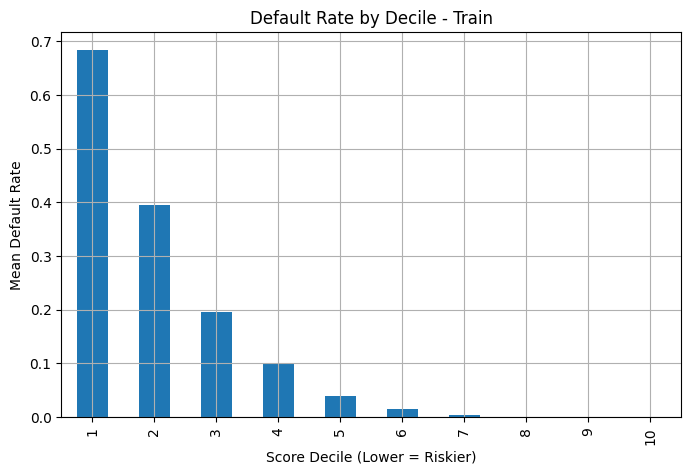

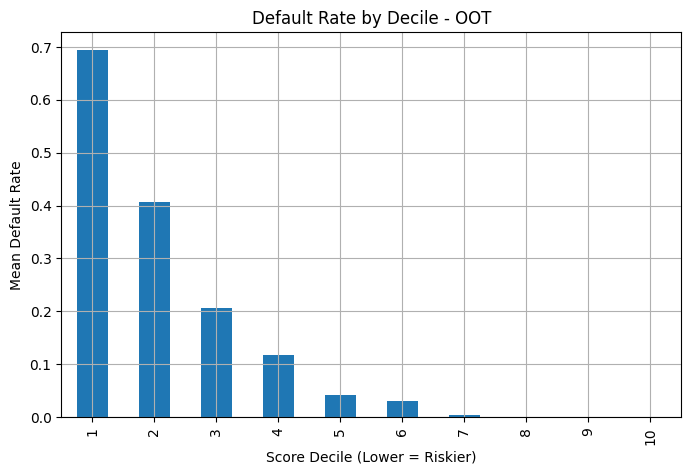

In [53]:
def rank_ordering_plot(y_true, y_proba, dataset_name='Train'):
    df = pd.DataFrame({'actual': y_true, 'proba': y_proba})
    df['decile'] = pd.qcut(df['proba'], 10, labels=False, duplicates='drop') + 1
    df['decile'] = 11 - df['decile']
    grouped = df.groupby('decile')['actual'].mean()

    plt.figure(figsize=(8, 5))
    grouped.plot(kind='bar')
    plt.title(f'Default Rate by Decile - {dataset_name}')
    plt.xlabel('Score Decile (Lower = Riskier)')
    plt.ylabel('Mean Default Rate')
    plt.grid(True)
    plt.show()

# Plots for Train and OOT
rank_ordering_plot(y_train, y_train_proba, 'Train')
rank_ordering_plot(y_oot, y_oot_proba, 'OOT')

### Decile 1 has highest probability of Default (PD) whereas Decile 10 has the lowest PD

### This helps us identify which decile (or score range) to use as a decision threshold (e.g., reject all applicants in Deciles 1-3).

### Now, we will do the same things for Balanced RF and XGBoost algorithms and evaluate the model performance.

## 2. Balanced Random Forest

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier

### Hyperparameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for Balanced Random Forest Classifier
#param_grid_brf = {
#    'n_estimators': [100, 200, 500],
#    'max_depth': [None, 5, 10, 20],
#    'class_weight': [None, 'balanced'],

#}
#brf_grid = GridSearchCV(BalancedRandomForestClassifier(), param_grid_brf, scoring = 'roc_auc', cv=5,n_jobs = -1)
#brf_grid.fit(X_train, y_train)

#print(brf_grid.best_params_)

In [56]:
brf = BalancedRandomForestClassifier(class_weight = None, max_depth = 10, n_estimators = 500, random_state=42)

#Fit the model
brf.fit(X_train, y_train)

# Predicting on training and OOT sets
y_train_brf_pred = brf.predict(X_train)
y_oot_brf_pred = brf.predict(X_oot)

# Predicted probabilities
y_train_brf_proba = brf.predict_proba(X_train)[:, 1]
y_oot_brf_proba = brf.predict_proba(X_oot)[:, 1]

# Gini = 2 * AUC - 1
gini_train_brf = 2 * roc_auc_score(y_train, y_train_brf_proba) - 1
gini_oot_brf = 2 * roc_auc_score(y_oot, y_oot_brf_proba) - 1

# Evaluating performance
print("TRAIN SET EVALUATION:")
print(confusion_matrix(y_train, y_train_brf_pred))
print(classification_report(y_train, y_train_brf_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_brf_proba ))
print("Gini (Train):", round(gini_train_brf, 4))

print("\nOOT SET EVALUATION:")
print(confusion_matrix(y_oot, y_oot_brf_pred))
print(classification_report(y_oot, y_oot_brf_pred))
print("ROC-AUC:", roc_auc_score(y_oot,y_oot_brf_proba ))
print("Gini (OOT):", round(gini_oot_brf, 4))

TRAIN SET EVALUATION:
[[4940  890]
 [  11  962]]
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      5830
         1.0       0.52      0.99      0.68       973

    accuracy                           0.87      6803
   macro avg       0.76      0.92      0.80      6803
weighted avg       0.93      0.87      0.88      6803

ROC-AUC: 0.9697988044261968
Gini (Train): 0.9396

OOT SET EVALUATION:
[[1827  410]
 [  63  332]]
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      2237
         1.0       0.45      0.84      0.58       395

    accuracy                           0.82      2632
   macro avg       0.71      0.83      0.73      2632
weighted avg       0.89      0.82      0.84      2632

ROC-AUC: 0.9108061768983098
Gini (OOT): 0.8216


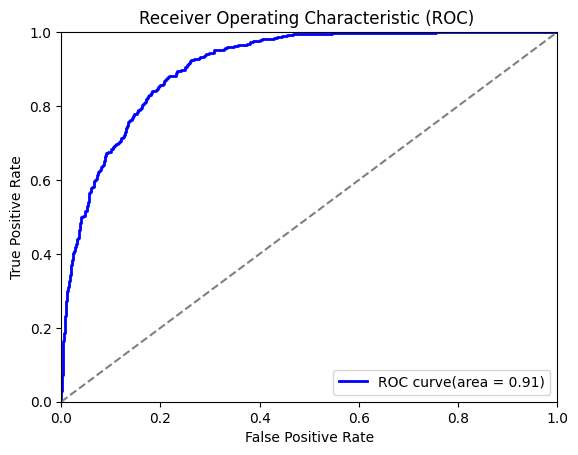

In [57]:
# plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_oot, y_oot_brf_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label= 'ROC curve(area = %0.2f)' % roc_auc_score(y_oot, y_oot_brf_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) ')
plt.legend(loc='lower right')
plt.show()

In [58]:
#Creating DataFrames for train and OOT with predicted probabilities and actual target
train_brf_results = pd.DataFrame({
    'probability': y_train_brf_proba,
    'target': y_train
})

oot_brf_results = pd.DataFrame({
    'probability': y_oot_brf_proba,
    'target': y_oot
})

#Creating deciles based on training data
quantiles = train_brf_results['probability'].quantile(np.linspace(0, 1, 11)).values  # 11 bin edges for 10 deciles

#Assigning deciles to training data
train_brf_results['decile'] = pd.cut(train_brf_results['probability'], bins=quantiles, labels=False, include_lowest=True)
train_brf_results['decile'] = 10 - train_brf_results['decile']  # Decile 1 = highest prob

#Assigning same decile cutoffs to OOT data
oot_brf_results['decile'] = pd.cut(oot_brf_results['probability'], bins=quantiles, labels=False, include_lowest=True)
oot_brf_results['decile'] = 10 - oot_brf_results['decile']

#Summarizing  training data
train_brf_summary = train_brf_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
train_brf_summary['Default_rate'] = (train_brf_summary['Default_rate'] * 100).round(2)

#Summarizing OOT data
oot_brf_summary = oot_brf_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
oot_brf_summary['Default_rate'] = (oot_brf_summary['Default_rate'] * 100).round(2)


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in training data

In [59]:
print(pd.DataFrame(train_brf_summary))

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   681                 567.0         83.26
1       2                   680                 303.0         44.56
2       3                   680                  97.0         14.26
3       4                   680                   6.0          0.88
4       5                   680                   0.0          0.00
5       6                   681                   0.0          0.00
6       7                   680                   0.0          0.00
7       8                   680                   0.0          0.00
8       9                   680                   0.0          0.00
9      10                   681                   0.0          0.00


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in oot data

In [60]:
print(oot_brf_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   240                 170.0         70.83
1       2                   269                 103.0         38.29
2       3                   315                  73.0         23.17
3       4                   293                  32.0         10.92
4       5                   251                  12.0          4.78
5       6                   289                   4.0          1.38
6       7                   237                   0.0          0.00
7       8                   267                   1.0          0.37
8       9                   243                   0.0          0.00
9      10                   228                   0.0          0.00


In [61]:
# Calculating Capture rates in training and oot data in top 3 deciles

cap_rate_brf_train = (sum(train_brf_summary['number_of_defaulters'][0:3])/sum(train_brf_summary['number_of_defaulters']))*100
print(round(cap_rate_brf_train, 2), '%')

cap_rate_brf_oot = (sum(oot_brf_summary['number_of_defaulters'][0:3])/sum(oot_brf_summary['number_of_defaulters']))*100
print(round(cap_rate_brf_oot, 2), '%')


99.38 %
87.59 %


### Training data has a capture rate of 99.49% and OOT data has a capture rate of 87.85% in top 3 deciles.

### Interpretation: Though our model is able to capture 99.49% actual defaulters in training data, it is only able to capture 87.85% of actual defaulters in oot data, indicating a case of overfitting.

In [62]:
# Lift calculation for top 30%

training_lift_brf = ((563 + 300 + 105)/(681 + 680 + 680))/(973/6803)
oot_lift_brf = ((172 + 104 + 71)/(239 + 276 + 309))/(395/2632)
print(training_lift_brf)
print(oot_lift_brf)

3.3160417001318803
2.8060218753840482


### Interpretation: Lift in top 30% is 3.32x in training data and 2.81x in out-of-time indicating that top 30% of our model would help to capture defaulters nearly 3x better than considering random 30% of population.

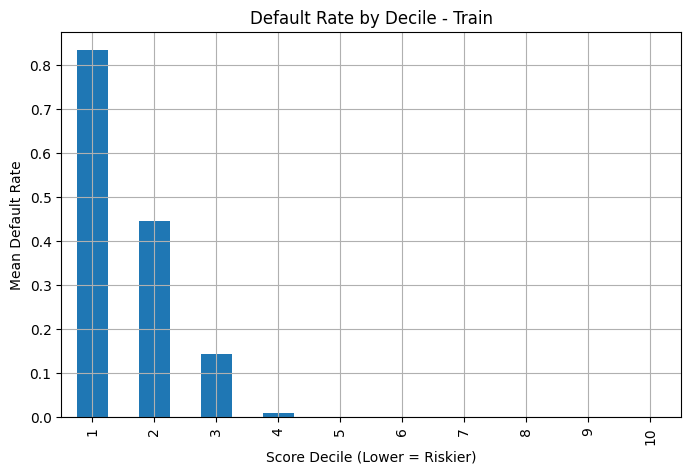

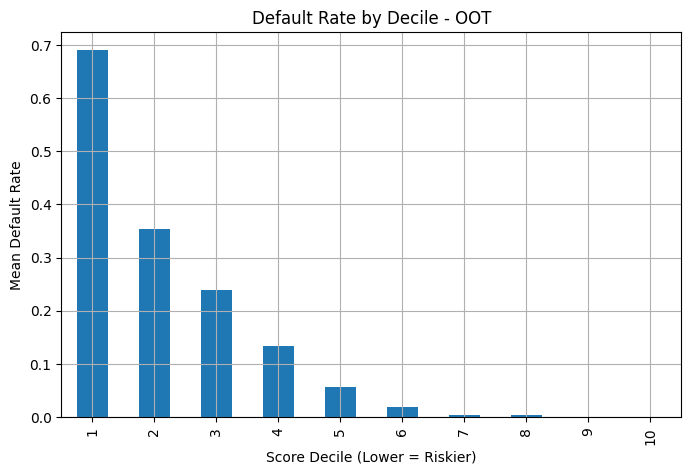

In [63]:
# Rank Ordering Plots for Train and OOT for Balanced Random Forest
rank_ordering_plot(y_train, y_train_brf_proba, 'Train')
rank_ordering_plot(y_oot, y_oot_brf_proba, 'OOT')

## 3. a) XGBClassifier after implementing SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state = 42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)


### Distribution of defaulters and non-defaulters after applying SMOTE in training dataset

In [65]:
y_resampled_smote.value_counts()

,count
target_var,
1.0,5830
0.0,5830


### Hyperparameter tuning using GridSearchCV

In [66]:
from xgboost import XGBClassifier

# Hyperparameter tuning for XGB Classifier
#param_grid_xgb = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'subsample': [0.6, 0.8, 1.0],
#    'reg_alpha': [0, 0.1, 1],
#    'reg_lambda': [1, 1.5, 2]

#}
#xgb_grid = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring = 'roc_auc', cv=5,n_jobs = -1)
#xgb_grid.fit(X_resampled_smote, y_resampled_smote)

#print(xgb_grid.best_params_)

In [67]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 300, subsample = 0.8 , reg_alpha = 0.1, reg_lambda = 1, random_state=42)

#Fit the model
xgb.fit(X_resampled_smote, y_resampled_smote)

# Predicting on training and OOT sets
y_train_xgb_pred = xgb.predict(X_resampled_smote)
y_oot_xgb_pred = xgb.predict(X_oot)

# Predicted probabilities
y_train_xgb_proba = xgb.predict_proba(X_resampled_smote)[:, 1]
y_oot_xgb_proba = xgb.predict_proba(X_oot)[:, 1]

# Gini = 2 * AUC - 1
gini_train_xgb = 2 * roc_auc_score(y_resampled_smote, y_train_xgb_proba) - 1
gini_oot_xgb = 2 * roc_auc_score(y_oot, y_oot_xgb_proba) - 1

# Evaluating performance
print("TRAIN SET EVALUATION:")
print(confusion_matrix(y_resampled_smote, y_train_xgb_pred))
print(classification_report(y_resampled_smote, y_train_xgb_pred))
print("ROC-AUC:", roc_auc_score(y_resampled_smote, y_train_xgb_proba ))
print("Gini (Train):", round(gini_train_xgb, 4))

print("\nOOT SET EVALUATION:")
print(confusion_matrix(y_oot, y_oot_xgb_pred))
print(classification_report(y_oot, y_oot_xgb_pred))
print("ROC-AUC:", roc_auc_score(y_oot,y_oot_xgb_proba ))
print("Gini (OOT):", round(gini_oot_xgb, 4))

TRAIN SET EVALUATION:
[[5751   79]
 [   8 5822]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5830
         1.0       0.99      1.00      0.99      5830

    accuracy                           0.99     11660
   macro avg       0.99      0.99      0.99     11660
weighted avg       0.99      0.99      0.99     11660

ROC-AUC: 0.999902997743381
Gini (Train): 0.9998

OOT SET EVALUATION:
[[1969  268]
 [ 132  263]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      2237
         1.0       0.50      0.67      0.57       395

    accuracy                           0.85      2632
   macro avg       0.72      0.77      0.74      2632
weighted avg       0.87      0.85      0.86      2632

ROC-AUC: 0.897384041692366
Gini (OOT): 0.7948


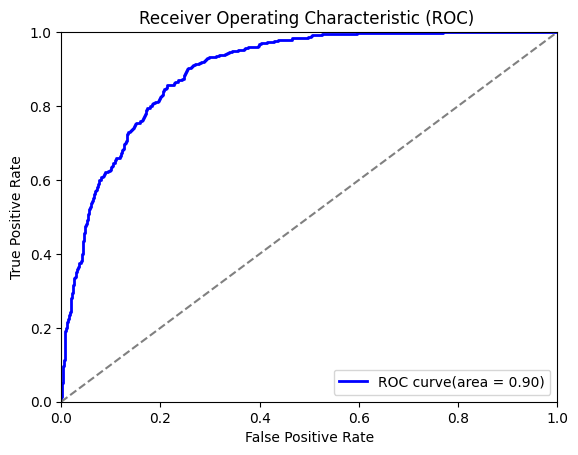

In [68]:
# plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_oot, y_oot_xgb_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label= 'ROC curve(area = %0.2f)' % roc_auc_score(y_oot, y_oot_xgb_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) ')
plt.legend(loc='lower right')
plt.show()

In [69]:
#Creating DataFrames for train and OOT with predicted probabilities and actual target
train_xgb_results = pd.DataFrame({
    'probability': y_train_xgb_proba,
    'target': y_resampled_smote
})

oot_xgb_results = pd.DataFrame({
    'probability': y_oot_xgb_proba,
    'target': y_oot
})

#Creating deciles based on training data
quantiles = train_xgb_results['probability'].quantile(np.linspace(0, 1, 11)).values  # 11 bin edges for 10 deciles

#Assigning deciles to training data
train_xgb_results['decile'] = pd.cut(train_xgb_results['probability'], bins=quantiles, labels=False, include_lowest=True)
train_xgb_results['decile'] = 10 - train_xgb_results['decile']  # Decile 1 = highest prob

#Assigning same decile cutoffs to OOT data
oot_xgb_results['decile'] = pd.cut(oot_xgb_results['probability'], bins=quantiles, labels=False, include_lowest=True)
oot_xgb_results['decile'] = 10 - oot_xgb_results['decile']

#Summarizing  training data
train_xgb_summary = train_xgb_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
train_xgb_summary['Default_rate'] = (train_xgb_summary['Default_rate'] * 100).round(2)

#Summarizing OOT data
oot_xgb_summary = oot_xgb_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
oot_xgb_summary['Default_rate'] = (oot_xgb_summary['Default_rate'] * 100).round(2)


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in training data

In [70]:
print(train_xgb_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                  1166                1166.0        100.00
1       2                  1166                1166.0        100.00
2       3                  1166                1166.0        100.00
3       4                  1166                1166.0        100.00
4       5                  1166                1137.0         97.51
5       6                  1166                  29.0          2.49
6       7                  1166                   0.0          0.00
7       8                  1166                   0.0          0.00
8       9                  1166                   0.0          0.00
9      10                  1166                   0.0          0.00


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in oot data

In [71]:
print (oot_xgb_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                    37                  28.0         75.68
1       2                    46                  37.0         80.43
2       3                    55                  31.0         56.36
3       4                    77                  46.0         59.74
4       5                   255                 106.0         41.57
5       6                   475                 110.0         23.16
6       7                   400                  26.0          6.50
7       8                   422                  10.0          2.37
8       9                   440                   1.0          0.23
9      10                   425                   0.0          0.00


In [72]:
# Calculating Capture rates in training and oot data in top 3 deciles

cap_rate_xgb_train = (sum(train_xgb_summary['number_of_defaulters'][0:3])/sum(train_xgb_summary['number_of_defaulters']))*100
print(round(cap_rate_xgb_train, 2), '%')

cap_rate_xgb_oot = (sum(oot_xgb_summary['number_of_defaulters'][0:3])/sum(oot_xgb_summary['number_of_defaulters']))*100
print(round(cap_rate_xgb_oot, 2), '%')


60.0 %
24.3 %


### Interpretation: This model has poor capture rate across both training and oot. This might be due to implementing SMOTE.

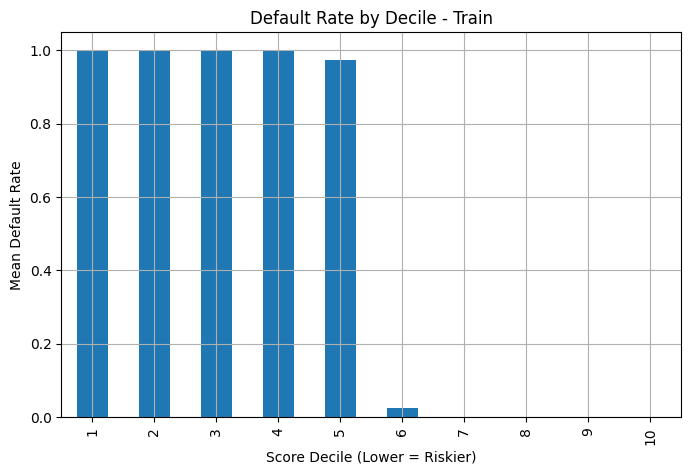

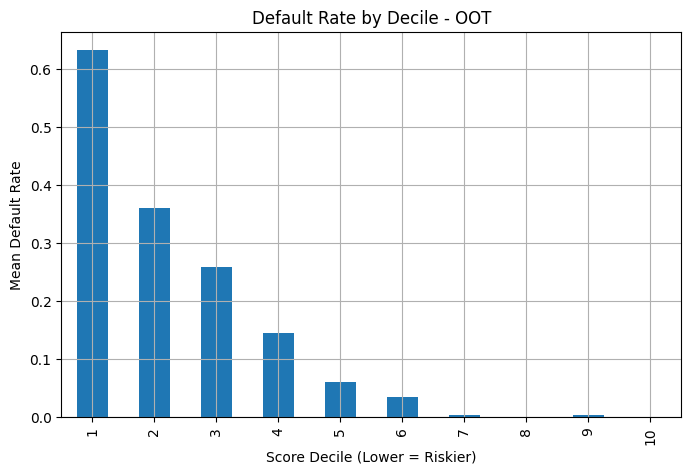

In [73]:
# Rank Ordering Plots for Train and OOT for XGBoost Classifier
rank_ordering_plot(y_resampled_smote, y_train_xgb_proba, 'Train')
rank_ordering_plot(y_oot, y_oot_xgb_proba, 'OOT')

### 3. b) XGBClassifier using scale_pos_weight

In [74]:
# scale_pos_weight = Number of negative samples / Number of positive samples
scale_pos_weight = 5830 / 973
print(scale_pos_weight)

5.991778006166496


### Hyperparameter tuning using GridSearchCV

In [75]:
# Hyperparameter tuning for XGB Classifier
#param_grid_xgb_spw = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'subsample': [0.6, 0.8, 1.0],
#    'scale_pos_weight': [6.0],
#    'reg_alpha': [0, 0.1, 1],
#    'reg_lambda': [1, 1.5, 2]

#}
#xgb_spw_grid = GridSearchCV(XGBClassifier(), param_grid_xgb_spw, scoring = 'roc_auc', cv=5,n_jobs = -1)
#xgb_spw_grid.fit(X_train, y_train)

#print(xgb_spw_grid.best_params_)

In [76]:
xgb_spw = XGBClassifier(scale_pos_weight = 6.0, learning_rate = 0.1, max_depth = 3, n_estimators = 100, subsample = 0.8,
                        reg_alpha = 1, reg_lambda = 2, random_state=42)

#Fit the model
xgb_spw.fit(X_train, y_train)

# Predicting on training and OOT sets
y_train_xgb_spw_pred = xgb_spw.predict(X_train)
y_oot_xgb_spw_pred = xgb_spw.predict(X_oot)

# Predicted probabilities
y_train_xgb_spw_proba = xgb_spw.predict_proba(X_train)[:, 1]
y_oot_xgb_spw_proba = xgb_spw.predict_proba(X_oot)[:, 1]

# Gini = 2 * AUC - 1
gini_train_xgb_spw = 2 * roc_auc_score(y_train, y_train_xgb_spw_proba) - 1
gini_oot_xgb_spw = 2 * roc_auc_score(y_oot, y_oot_xgb_spw_proba) - 1

# Evaluating performance
print("TRAIN SET EVALUATION:")
print(confusion_matrix(y_train, y_train_xgb_spw_pred))
print(classification_report(y_train, y_train_xgb_spw_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_xgb_spw_proba ))
print("Gini (Train):", round(gini_train_xgb_spw, 4))

print("\nOOT SET EVALUATION:")
print(confusion_matrix(y_oot, y_oot_xgb_spw_pred))
print(classification_report(y_oot, y_oot_xgb_spw_pred))
print("ROC-AUC:", roc_auc_score(y_oot,y_oot_xgb_spw_proba ))
print("Gini (OOT):", round(gini_oot_xgb_spw, 4))

TRAIN SET EVALUATION:
[[4797 1033]
 [  89  884]]
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.90      5830
         1.0       0.46      0.91      0.61       973

    accuracy                           0.84      6803
   macro avg       0.72      0.87      0.75      6803
weighted avg       0.91      0.84      0.85      6803

ROC-AUC: 0.9390230036015296
Gini (Train): 0.878

OOT SET EVALUATION:
[[1808  429]
 [  56  339]]
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      2237
         1.0       0.44      0.86      0.58       395

    accuracy                           0.82      2632
   macro avg       0.71      0.83      0.73      2632
weighted avg       0.89      0.82      0.84      2632

ROC-AUC: 0.9127555553040635
Gini (OOT): 0.8255


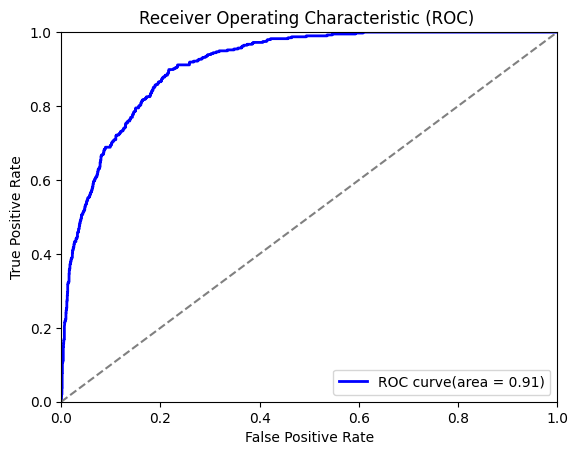

In [77]:
# plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_oot, y_oot_xgb_spw_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label= 'ROC curve(area = %0.2f)' % roc_auc_score(y_oot, y_oot_xgb_spw_proba))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) ')
plt.legend(loc='lower right')
plt.show()

In [78]:
#Creating DataFrames for train and OOT with predicted probabilities and actual target
train_xgb_spw_results = pd.DataFrame({
    'probability': y_train_xgb_spw_proba,
    'target': y_train
})

oot_xgb_spw_results = pd.DataFrame({
    'probability': y_oot_xgb_spw_proba,
    'target': y_oot
})

#Creating deciles based on training data
quantiles = train_xgb_spw_results['probability'].quantile(np.linspace(0, 1, 11)).values  # 11 bin edges for 10 deciles

#Assigning deciles to training data
train_xgb_spw_results['decile'] = pd.cut(train_xgb_spw_results['probability'], bins=quantiles, labels=False, include_lowest=True)
train_xgb_spw_results['decile'] = 10 - train_xgb_spw_results['decile']  # Decile 1 = highest prob

#Assigning same decile cutoffs to OOT data
oot_xgb_spw_results['decile'] = pd.cut(oot_xgb_spw_results['probability'], bins=quantiles, labels=False, include_lowest=True)
oot_xgb_spw_results['decile'] = 10 - oot_xgb_spw_results['decile']

#Summarizing  training data
train_xgb_spw_summary = train_xgb_spw_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
train_xgb_spw_summary['Default_rate'] = (train_xgb_spw_summary['Default_rate'] * 100).round(2)

#Summarizing OOT data
oot_xgb_spw_summary = oot_xgb_spw_results.groupby('decile').agg(
    number_of_applicants=('target', 'count'),
    number_of_defaulters=('target', 'sum'),
    Default_rate=('target', 'mean')
).reset_index().sort_values('decile')
oot_xgb_spw_summary['Default_rate'] = (oot_xgb_spw_summary['Default_rate'] * 100).round(2)


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in training data

In [79]:
print(train_xgb_spw_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   681                 483.0         70.93
1       2                   680                 294.0         43.24
2       3                   680                 129.0         18.97
3       4                   680                  50.0          7.35
4       5                   680                  13.0          1.91
5       6                   681                   4.0          0.59
6       7                   680                   0.0          0.00
7       8                   680                   0.0          0.00
8       9                   680                   0.0          0.00
9      10                   681                   0.0          0.00


### Table showing the deciles, number of loan applicants, number of defaulters, and the default % in oot data

In [80]:
print(oot_xgb_spw_summary)

   decile  number_of_applicants  number_of_defaulters  Default_rate
0       1                   275                 191.0         69.45
1       2                   263                  94.0         35.74
2       3                   282                  64.0         22.70
3       4                   268                  26.0          9.70
4       5                   256                  13.0          5.08
5       6                   268                   4.0          1.49
6       7                   247                   3.0          1.21
7       8                   266                   0.0          0.00
8       9                   277                   0.0          0.00
9      10                   230                   0.0          0.00


In [81]:
# Calculating Capture rates in training and oot data in top 3 deciles

cap_rate_xgb_spw_train = (sum(train_xgb_spw_summary['number_of_defaulters'][0:3])/sum(train_xgb_spw_summary['number_of_defaulters']))*100
print(round(cap_rate_xgb_spw_train, 2), '%')

cap_rate_xgb_spw_oot = (sum(oot_xgb_spw_summary['number_of_defaulters'][0:3])/sum(oot_xgb_spw_summary['number_of_defaulters']))*100
print(round(cap_rate_xgb_spw_oot, 2), '%')


93.11 %
88.35 %


### Interpretation: Here, the capture rates are good across both training and oot data as expected.

In [82]:
# Lift calculation for top 30%

training_lift_xgb_spw = ((483 + 294 + 129)/(681 + 680 + 680))/(973/6803)
oot_lift_xgb_spw = ((191 + 94 + 64)/(275 + 263 + 282))/(395/2632)
print(training_lift_xgb_spw)
print(oot_lift_xgb_spw)

3.1036505995035983
2.8359617165791913


### Interpretation: Lift in top 30% is 3.10x in training data and 2.83x in out-of-time indicating that top 30% of our model would help to capture defaulters nearly 3x better than considering random 30% of population. The lift is almost as same as the one we got in Logistic Regression.

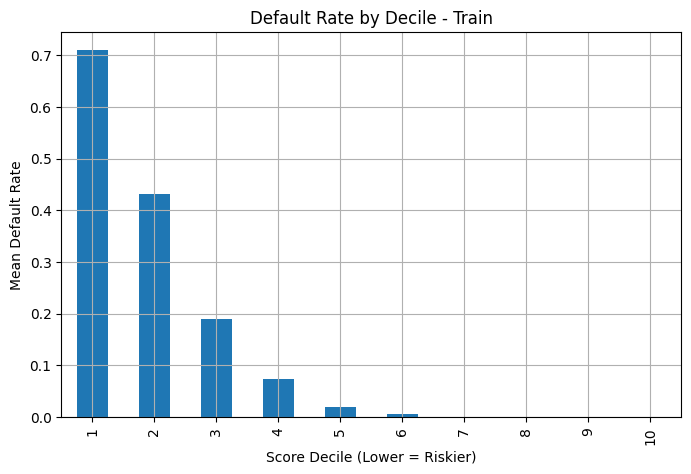

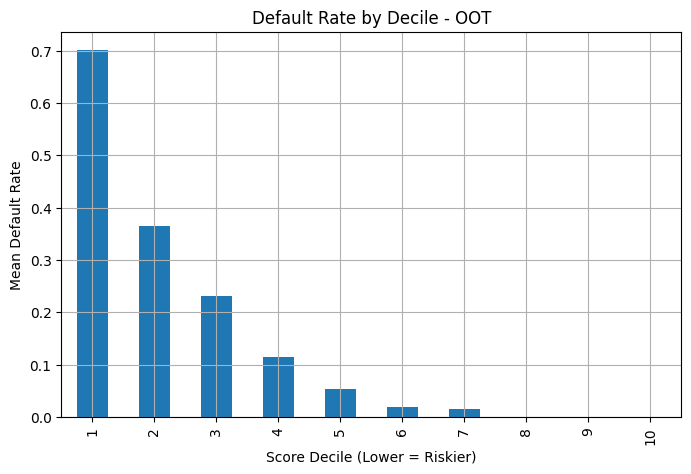

In [83]:
# Rank Ordering Plots for Train and OOT for XGBoost Classifier
rank_ordering_plot(y_train, y_train_xgb_spw_proba, 'Train')
rank_ordering_plot(y_oot, y_oot_xgb_spw_proba, 'OOT')

## Conclusion: After evaluating the performance of different models, I have decided to use Logistic Regression as the best model in this scenario.

In [84]:
import shap
from shap import LinearExplainer

explainer = shap.LinearExplainer(log_reg, X_train, link=shap.links.identity)
shap_values= explainer.shap_values(X_oot)

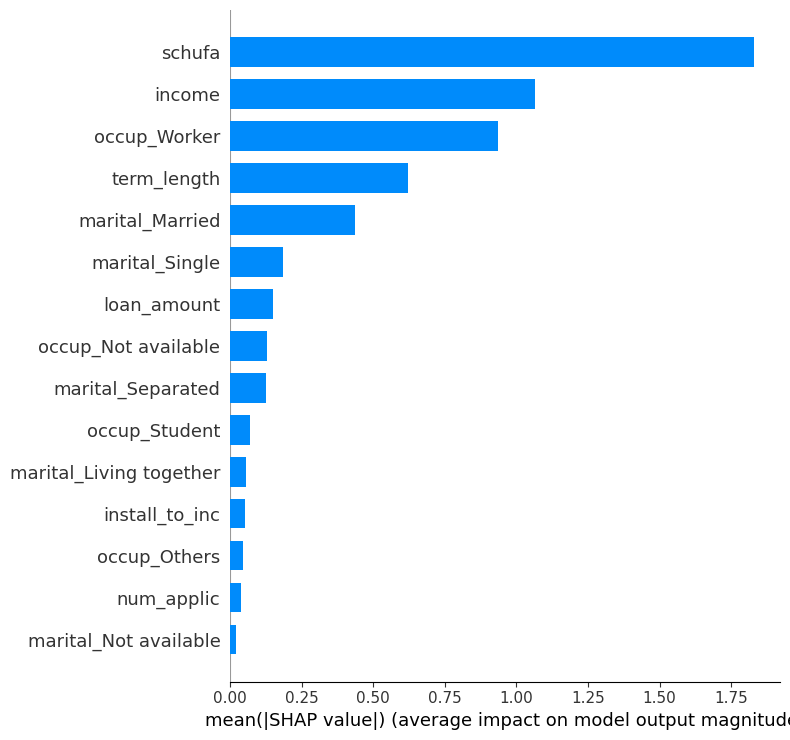

In [85]:
shap.summary_plot(shap_values, X_oot, plot_type="bar")

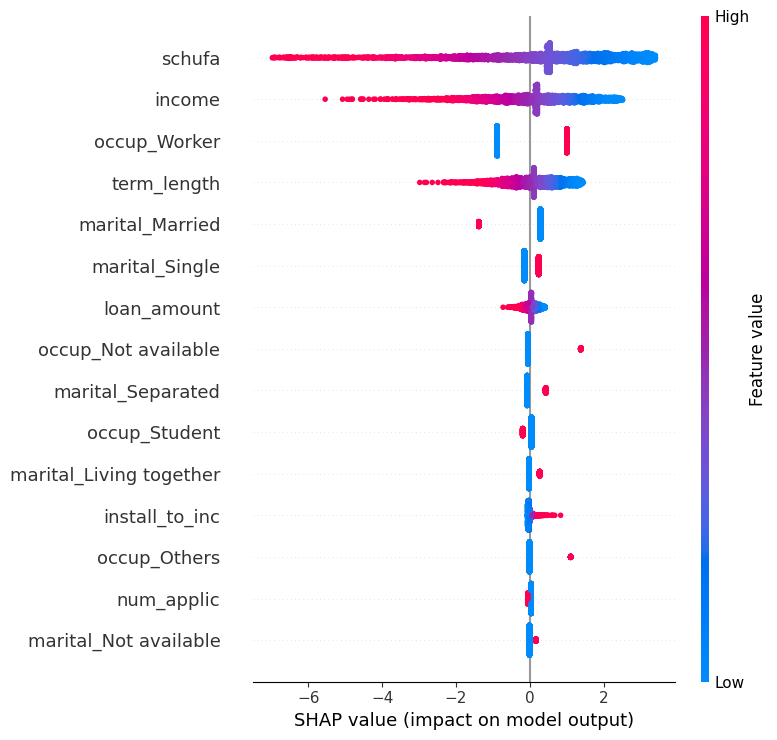

In [86]:
# Plot SHAP summary
shap.summary_plot(shap_values, X_oot)

### From the summary plot, it is evident that Low Schufa score (Credit score), Low income, and low term length mostly leads to deafult in our dataset. We also see that higher loan amounts reduce default risk (maybe large loans are approved only for good customers).

In [87]:
print(explainer.expected_value)

-2.54476748235542


In [92]:
import flask
import sklearn
import matplotlib
import seaborn
print("Flask:", flask.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)

Flask: 3.1.1
NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1
Matplotlib: 3.10.0
Seaborn: 0.13.2


/tmp/ipython-input-92-3438085611.py:5: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.2. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask:", flask.__version__)


In [93]:
import pickle

# Save the preprocessing pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Save the trained logistic regression model
with open('model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)